In [324]:
import pandas as pd
import os
import datetime as dt
import numpy as np
#set the location
location = os.path.realpath(
    os.path.join(os.getcwd(), os.path.dirname('Code_Complaints_and_Violations.csv')))

In [325]:
file_path=os.path.join(location,'Code_Complaints_and_Violations.csv')
viol_data=pd.read_csv(file_path)

$(1)$. How many building violations does the dataset contain?

In [326]:
tot_viol=len(viol_data)
print("(1). Total number of violations: "+str(tot_viol))

(1). Total number of violations: 171085


$(2)$. There are several record types in the data, contained in the "RecordType" column. What fraction of the records are of the second most common type?

In [330]:
fraction_2nd_common=viol_data.RecordType.value_counts()[1]/viol_data.RecordType.value_counts().sum()
second_most_common_type=viol_data.RecordType.value_counts()[1:].idxmax()

In [331]:
print("(2). Second most common type of complaints are related to \' "+second_most_common_type+"\' with fraction {:.2f}".format(fraction_2nd_common)+".")

(2). Second most common type of complaints are related to ' Notice of Violation' with fraction 0.16.


$(3)$For only records in 2022, what is the probability a record's current status is "Closed" given the description type is "Weeds"?

In [307]:
#Get a more detailed look at the relevant data
#first conver OpenDate to a datetype data
viol_data['OpenDate'] = pd.to_datetime(viol_data.OpenDate, format='%Y-%m-%d')
#now get the records only in 2022
#interesting year and type are
int_year=2022
int_type='Weeds'
int_status='Closed'
#We can now see the interesting part of the data based on three condition
record_year_type=viol_data[(viol_data['OpenDate'].dt.year==int_year) 
                           & (viol_data['RecordTypeDesc'].str.contains(int_type,case=False,na=False))]

total_type_in_year=len(record_year_type)
total_closed=sum(record_year_type['StatusCurrent']=='Closed')

In [308]:
print("(3). It seems that there are no records in 2022 whose description is \'Weeds\' and the current status is is \'Closed\' so the probability is "+str(total_closed/total_type_in_year))

(3). It seems that there are no records in 2022 whose description is 'Weeds' and the current status is is 'Closed' so the probability is 0.0


$(4)$. How does the records dealing with parking vary across Seattle? For each ZIP code, calculate the number of records that deal with parking per capita. For simplification, a record dealing with parking is one with with the string "parking" appearing anywhere in the description string (without regards to case). Once you have the records per capita for each ZIP code, report the standard deviation. Exclude ZIP codes that do not have at least 100 records dealing with parking.

In [309]:
#First let's first gather relevant data and see what it looks like
viol_parking=viol_data[(viol_data['Description'].str.contains('parking',case=False,na=False))].dropna()
viol_parking['OriginalZip']=viol_parking['OriginalZip'].astype('int')

In [310]:
#Now let us calculate total parking violatons per zip code and store this information.
tot_parking_viol_zip=viol_parking['OriginalZip'].value_counts().to_frame().reset_index()
tot_parking_viol_zip.columns=['ZIP','TotalParkingViolations']
#Keep only >=100 parking violations
tot_parking_viol_zip=tot_parking_viol_zip[tot_parking_viol_zip['TotalParkingViolations']>=100]

In [311]:
#Let us now read the population data and then compute the violations per capita
pop_file_path=os.path.join(location,"seattle_population_by_ZIP.csv")
pop_data=pd.read_csv(pop_file_path)

In [312]:
#combine the two dataframes
pop_parking_viol=pop_data.merge(tot_parking_viol_zip,how='left',left_on='ZIP',right_on='ZIP').dropna()
#compute violations per capita
pop_parking_viol['ParkingViolationsPerCapita']=pop_parking_viol['TotalParkingViolations']/pop_parking_viol['population']
#Finally compute the standard deviation
viol_per_capita_std=pop_parking_viol['ParkingViolationsPerCapita'].std()
print('(4). The standard deviation in the parking violations per capita is '+ str(round(viol_per_capita_std,5))+' violations per person.')

(4). The standard deviation in the parking violations per capita is 0.00353 violations per person.


$(5)$. The number of records per year has generally been increasing over time. We can visualize this trend by plotting the number of records for each year. What is the slope of a line of best fit? Only include records between the years 2004 and 2020 (inclusive)..

In [316]:
#First let us compute number of violations each year
viol_data['Year']=viol_data['OpenDate'].dt.year
viol_each_year=viol_data.Year.value_counts().to_frame().reset_index()
viol_each_year.columns=['Year','TotalViolations']
viol_each_year=viol_each_year[(viol_each_year['Year']>=2004) & (viol_each_year['Year']<=2020)]

In [320]:
#Using a linear estimation
from sklearn.linear_model import LinearRegression
x=viol_each_year.Year.to_numpy().reshape((-1,1))
y=viol_each_year['TotalViolations'].to_numpy()
model=LinearRegression()
model.fit(x,y)
slp=model.coef_[0]
intcp=model.intercept_

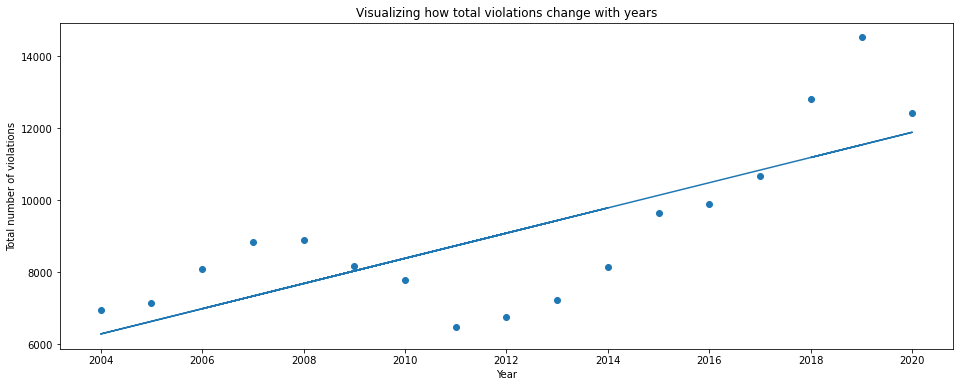

In [323]:
#Let us now visualize to see if it makes sense
#Visualize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(16,6))
plt.xlabel('Year')
plt.ylabel('Total number of violations')
plt.title('Visualizing how total violations change with years')
plt.scatter(viol_each_year['Year'],viol_each_year['TotalViolations'])
plt.plot(viol_each_year['Year'],slp*viol_each_year['Year']+intcp)
plt.show(block=True)

In [322]:
print('(5). The slope of the line of best fit is approximately ' +str(round(slp))+' violations per year.')


(5). The slope of the line of best fit is approximately 350 violations per year.
